# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from citipy import citipy
from api_keys import api_key
import re


# Incorporated citipy to determine city based on latitude and longitude


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
api_key

'e51ec8512eca0dc46b30a0927492a948'

In [3]:
output_data_file

'output_data/cities.csv'

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
d={}
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
result_lat_lng = tuple(lat_lngs)
final_lat_lng = list(result_lat_lng)
# Identify nearest city for each lat, lng combination
for lat_lng in final_lat_lng:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name   
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        d[city]=lat_lng
 # Print the city count to confirm sufficient count


In [5]:
d


{'qaanaaq': (85.00046386151593, -82.41923264628429),
 'daru': (-9.573044943718287, 143.22379749378575),
 'ialibu': (-7.3403658395313585, 144.61499079018898),
 'waipawa': (-48.38530987935947, 179.44186264189926),
 'karratha': (-18.387920140067408, 116.249945867865),
 'lorengau': (1.3792386976288498, 148.7715524781455),
 'hambantota': (0.7604940545087686, 85.27005719173923),
 'rikitea': (-81.2910707500062, -133.0346691986661),
 'puerto ayora': (3.1908692905981013, -90.95970128957937),
 'ushuaia': (-69.90531643108045, -71.18442523594422),
 'mataura': (-40.053270846036526, -153.8742643693829),
 'amderma': (76.62663662367373, 62.76260894257487),
 'bethalto': (38.956308485396306, -90.08075662059015),
 'severo-kurilsk': (28.79735611319562, 167.3884005781395),
 'busselton': (-73.77827242249855, 91.84194338024537),
 'vaini': (-38.17400430302212, -175.9544599015715),
 'mys shmidta': (70.78948552327472, -175.04930325702648),
 'bluff': (-72.56975754073598, 160.53629121463234),
 'fortuna': (37.6771

In [6]:
df = pd.DataFrame(list(d.items()), columns=['city_name', 'location'])
df = pd.concat([df['location'].apply(pd.Series),df['city_name']],axis =1)
df.columns = ['Lat','Lon','City_Name']
df.head()
selected_city = df.sample(n=500)
selected_city



,Lat,Lon,City_Name
355,63.124648,162.273985,evensk
500,-5.810637,11.341624,cabinda
113,34.992647,-130.177870,ukiah
98,39.397691,99.750191,zhangye
5,1.379239,148.771552,lorengau
52,13.437406,99.500967,chom bung
298,52.899351,158.263528,yelizovo
498,13.772720,2.485694,niamey
353,-38.670786,166.446898,westport
502,-17.023521,24.451344,sesheke


In [7]:
def get_city_weather(row):
    url = "https://api.openweathermap.org/data/2.5/weather?lat={}&lon={}&appid={}&units=imperial".format(row['Lat'],row['Lon'],api_key)
    response = requests.get(url).json()
    return response
# df = pd.DataFrame(list(d.items()), columns=['city_name', 'location'])
# df = pd.concat([df['location'].apply(pd.Series),df['city_name']],axis =1)
# df.columns = ['Lat','Lon','City_Name']

selected_city = df.sample(n=500)
selected_city["weather_result"] = selected_city.apply(get_city_weather,axis =1 )

selected_city.head()

,Lat,Lon,City_Name,weather_result
270,6.778172,-6.483293,daloa,"{'coord': {'lon': -6.48, 'lat': 6.78}, 'weathe..."
399,33.670503,-93.065608,camden,"{'coord': {'lon': -93.07, 'lat': 33.67}, 'weat..."
261,53.375449,112.610037,sosnovo-ozerskoye,"{'coord': {'lon': 112.61, 'lat': 53.38}, 'weat..."
473,-9.675140,156.067924,gizo,"{'coord': {'lon': 156.07, 'lat': -9.68}, 'weat..."
74,54.294853,-36.990860,nanortalik,"{'coord': {'lon': -36.99, 'lat': 54.29}, 'weat..."


In [9]:
selected_city['temperature'] = selected_city['weather_result'].map(lambda x: x.get("main").get("temp"))
selected_city['humidity'] = selected_city['weather_result'].map(lambda x: x.get("main").get("humidity"))
selected_city['wind'] = selected_city['weather_result'].map(lambda x: x.get("wind").get("speed"))
selected_city['cloundiness'] = selected_city['weather_result'].map(lambda x: x.get("clouds").get("all"))

In [10]:
selected_city

,Lat,Lon,City_Name,weather_result,temperature,humidity,wind,cloundiness
270,6.778172,-6.483293,daloa,"{'coord': {'lon': -6.48, 'lat': 6.78}, 'weathe...",74.37,87,4.61,8
399,33.670503,-93.065608,camden,"{'coord': {'lon': -93.07, 'lat': 33.67}, 'weat...",39.02,80,4.16,40
261,53.375449,112.610037,sosnovo-ozerskoye,"{'coord': {'lon': 112.61, 'lat': 53.38}, 'weat...",-11.58,67,2.48,0
473,-9.675140,156.067924,gizo,"{'coord': {'lon': 156.07, 'lat': -9.68}, 'weat...",81.93,100,14.23,80
74,54.294853,-36.990860,nanortalik,"{'coord': {'lon': -36.99, 'lat': 54.29}, 'weat...",40.17,100,12.21,64
114,69.296324,-45.309037,ilulissat,"{'coord': {'lon': -45.31, 'lat': 69.3}, 'weath...",-10.05,65,25.41,44
460,46.496421,-57.477724,burgeo,"{'coord': {'lon': -57.48, 'lat': 46.5}, 'weath...",30.45,100,27.31,8
178,35.450857,34.062537,ziyamet,"{'coord': {'lon': 34.06, 'lat': 35.45}, 'weath...",51.80,81,18.34,75
206,58.536829,177.868653,beringovskiy,"{'coord': {'lon': 177.87, 'lat': 58.54}, 'weat...",22.53,100,8.75,68
293,4.843907,-72.000278,mani,"{'coord': {'lon': -72, 'lat': 4.84}, 'weather'...",85.08,43,12.21,0


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


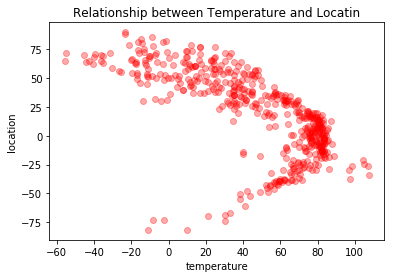

In [30]:
plt.scatter(selected_city["temperature"],selected_city["Lat"],c="r",alpha=.33)
plt.title("Relationship between Temperature and Locatin")
plt.xlabel('temperature')
plt.ylabel('location')
plt.savefig('TEMP')


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

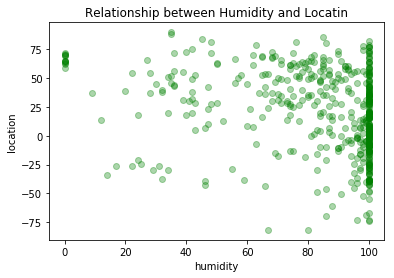

In [29]:
plt.scatter(selected_city["humidity"],selected_city["Lat"],c="g",alpha=.33)
plt.title("Relationship between Humidity and Locatin")
plt.xlabel('humidity')
plt.ylabel('location')
plt.savefig('HUMIDITY')

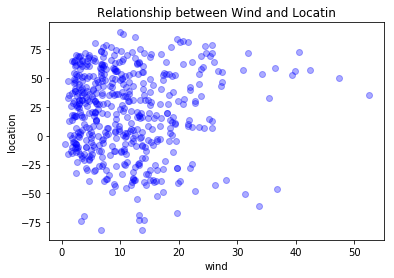

In [28]:
plt.scatter(selected_city["wind"],selected_city["Lat"],c="b",alpha=.33)
plt.title("Relationship between Wind and Locatin")
plt.xlabel('wind')
plt.ylabel('location')
plt.savefig('WIND')

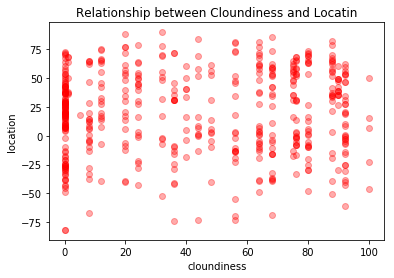

In [27]:
plt.scatter(selected_city["cloundiness"],selected_city["Lat"],c="r",alpha=.33)
plt.title("Relationship between Cloundiness and Locatin")
plt.xlabel('cloundiness')
plt.ylabel('location')
plt.savefig('CLOUNDINESS')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

#### Latitude vs. Humidity Plot

#### Latitude vs. Cloudiness Plot

#### Latitude vs. Wind Speed Plot